<a href="https://colab.research.google.com/github/hyejeong1111/Deeplearning/blob/main/5_%E1%84%8C%E1%85%A1%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%8B%E1%85%A5%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

- 자연어
  - 인간이 평소에 말하는 음성, 텍스트
- 자연어 처리
  - 자연어를 컴퓨터가 인식, 처리 하는것
  - Natural Language Processing(**NLP**)

# 한국어의 어려움

- 모호성, 다양한 표현, 불연속 데이터
- 교착어, 띄어쓰기 제각각, 평서문/의문문(? 붙임으로서 구분)
- 주어 생략 빈번
- 한자기반단어(표의문자), 한글(표음문자) 이에 다른 정보손실 발생

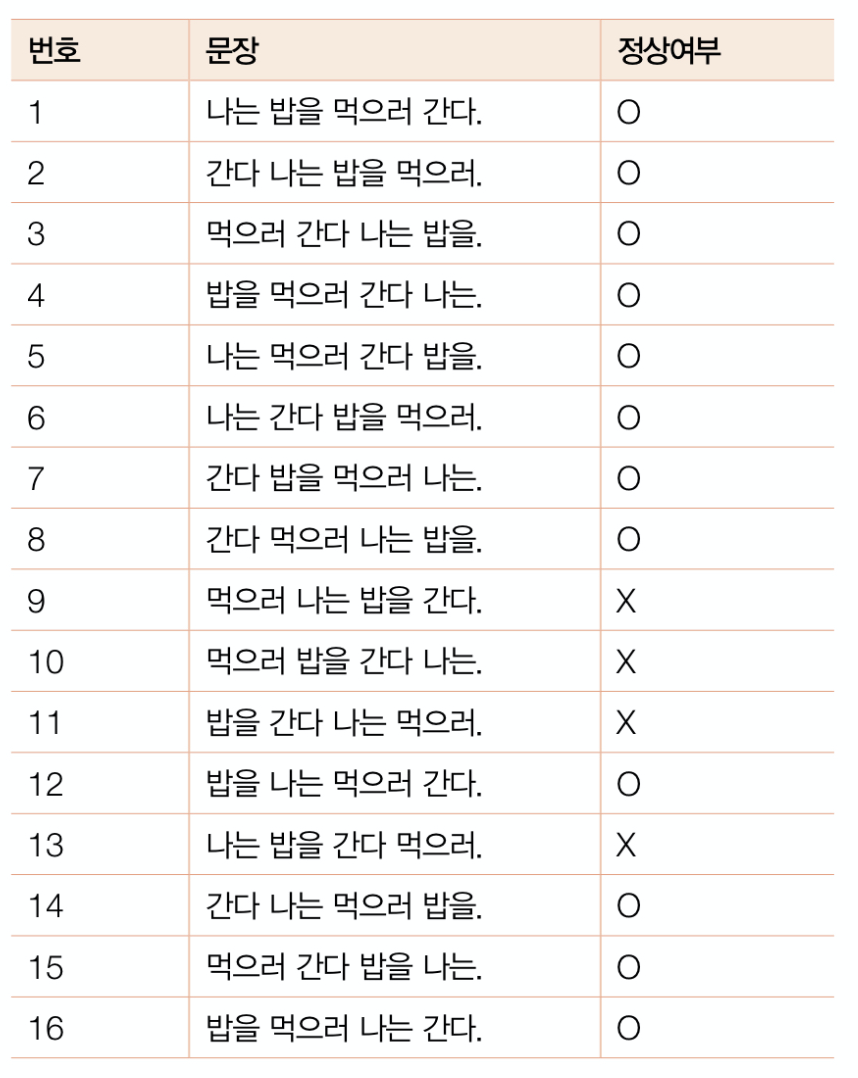

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/rnn/같은의미.png')

# 절차

- 전제 : 딥러닝/머신러닝을 수행하기 위해 데이터는 반드시 **수치**로 표현되야 한다.

- 텍스트 토큰화
  - 텍스트 데이터 -> 단어 임베딩 -> 연속적인 백터로 표현(수치)
    - 말뭉치 -> 분절 -> 사전화 -> 백터로표현 -> 패딩(을 통해서 모든장의 크기를 동일하게 구성) -> 정규화 -> 학습데이터 준비완료 => 사전이크면 데이터도 커진다 => 압축:단어 임베딩 => 학습전 데이터 준비완료 <- 전처리완료

- 분절
  - NLTK
    - 영어권, 한글에는 최적화되어 있지 않다
  - konlpy
    - Hannanum, Kkma, Komoran, **Mecab**, Okt등 토큰화 패키지
    - 이들 패지키를 통해 분절과정이 진행됨

- 용어정리(토큰, 토큰화)
  - 말뭉치를 나눌수 없는 단위까지 분해
    - 이 단위를 토큰(token)
      - 단어별, 문장별, 형태소별
    - 이 과정을 토큰화

# 토큰화 (분절과정)

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [ ]:
# 1. 분절화 대상 => 말뭉치중 하나의 문장
text = '''
내일까지 곳에 따라 돌풍과 천둥 번개를 동반한 강한 소나기가 내리겠습니다.
오늘 밤 경기 동부와 강원 영서, 충청권, 전라권, 경상권 내륙에 소나기가 오겠습니다.
'''

In [ ]:
result = text_to_word_sequence( text )
print('원문', text)
print('토큰화', result)
# 영어식으로 문장을 보고, 공백 중심으로 .을 중심으로 토큰화 작업 진행
# 문제 => 명사와 조사등등 결합된 구조를 쪼개지 않는다 => 한글에 적합한 분절 패키지 필요!!
# MeCab을 활용하여 분절후 다시 말뭉치를 구성 => 케라스  API를 활용 => 자연어 처리 진행

원문 
내일까지 곳에 따라 돌풍과 천둥 번개를 동반한 강한 소나기가 내리겠습니다.
오늘 밤 경기 동부와 강원 영서, 충청권, 전라권, 경상권 내륙에 소나기가 오겠습니다.

토큰화 ['내일까지', '곳에', '따라', '돌풍과', '천둥', '번개를', '동반한', '강한', '소나기가', '내리겠습니다', '오늘', '밤', '경기', '동부와', '강원', '영서', '충청권', '전라권', '경상권', '내륙에', '소나기가', '오겠습니다']


- Bag-of-Words
  - 단어의 가방
  - 같은 단어가 몇번 반복적으로 등장하는지 카운팅 하는 기법
  - 문장 => 핵심 키워드 추출, 빈도를 활용한 워드클라우드, 핵심 요약, 중요도 표현 등에 활용하는 자료

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
text = [
"내일까지 곳에 따라 돌풍과 천둥 번개를 동반한 강한 소나기가 내리겠습니다.",
"오늘 밤 경기 동부와 강원 영서, 충청권, 전라권, 경상권 내륙에 소나기가 오겠습니다."
]

In [ ]:
# 1. 토큰화 처리 객체 생성
token = Tokenizer()
# 2. 토큰화 진행
token.fit_on_texts( text )

In [ ]:
# 3. 카운트 확인
print( token.word_counts )
# 4. 문장 카운트
print( token.document_count )
# 5. 토큰이 몇개의 문장에 표한되어 있는지 -> 빈도와 유사하지만, 여러 문장에서 활용되는 지표
print( token.word_docs )
# 6. 토큰의 인덱스 => 사전
print( token.word_index )

OrderedDict([('내일까지', 1), ('곳에', 1), ('따라', 1), ('돌풍과', 1), ('천둥', 1), ('번개를', 1), ('동반한', 1), ('강한', 1), ('소나기가', 2), ('내리겠습니다', 1), ('오늘', 1), ('밤', 1), ('경기', 1), ('동부와', 1), ('강원', 1), ('영서', 1), ('충청권', 1), ('전라권', 1), ('경상권', 1), ('내륙에', 1), ('오겠습니다', 1)])
2
defaultdict(<class 'int'>, {'소나기가': 2, '내리겠습니다': 1, '천둥': 1, '동반한': 1, '번개를': 1, '곳에': 1, '돌풍과': 1, '강한': 1, '따라': 1, '내일까지': 1, '강원': 1, '충청권': 1, '밤': 1, '오겠습니다': 1, '동부와': 1, '전라권': 1, '오늘': 1, '내륙에': 1, '경기': 1, '영서': 1, '경상권': 1})
{'소나기가': 1, '내일까지': 2, '곳에': 3, '따라': 4, '돌풍과': 5, '천둥': 6, '번개를': 7, '동반한': 8, '강한': 9, '내리겠습니다': 10, '오늘': 11, '밤': 12, '경기': 13, '동부와': 14, '강원': 15, '영서': 16, '충청권': 17, '전라권': 18, '경상권': 19, '내륙에': 20, '오겠습니다': 21}


In [ ]:
# 7. 문장을 수치로 표현
x = token.texts_to_sequences( text )
x
# 문장의 크기가 제각각이라 => 수치로 표현할때 데이터의 크기도 제각각 => 패딩을 통해서 크기를 통일 할수 있다

[[2, 3, 4, 5, 6, 7, 8, 9, 1, 10],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 21]]

In [ ]:
# 사전의 개수
len(token.word_index)

21

In [ ]:
# 패딩은 별도로 다룬다
text  = '내일까지 곳에 따라 돌풍과 천둥 번개를 동반한 강한 소나기가 내리겠습니다.'
token = Tokenizer()
token.fit_on_texts( [text] )
x     = token.texts_to_sequences( [text] )
x

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [ ]:
# 8. 정규화 과정 -> 원-핫 인코딩(0과 1로 데이터를 표현)
from tensorflow.keras.utils import to_categorical

# 케라스에서는 맨 앞자리가 1로 나오는 원-핫인코딩은 미지원
# 전체 토큰 개수에서 +1을 하여 클레스의 개수를 지정
y = to_categorical(x, num_classes=(len(token.word_index)+1) )
y

# 만약 사전이 십만개라면, 원-핫 인코딩시 토큰 1개에 대한 데이터 크기는 십만+1 => 문장단위로 보면 너무 크다
# => 임베딩을 통해서 압축한다

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

# 단어 임베딩

- 원-핫 인코딩 문제점
  - 말뭉치가 크면 클수록 토큰에 대한 백터의 길이가 기하 급수적으로 커질수 있다
  - 해결방법
    - 단어 임베딩(word embedding)
- 특징
  - 주어진(정해진) 크기로 압축함
  - 원리는 각 단어의 유사도를 계산하여 처리
    - 행복은 좋다게 가깝고, 나쁘다에 멀다

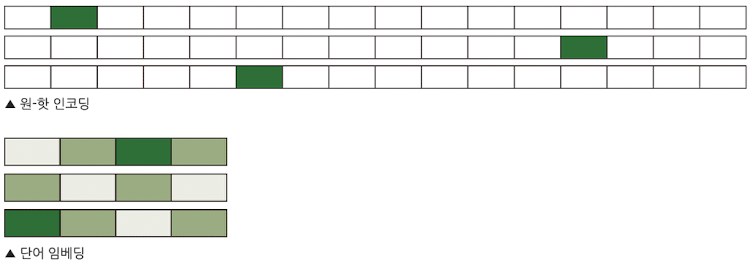

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/rnn/원-핫인코딩vs단어임베딩.png')

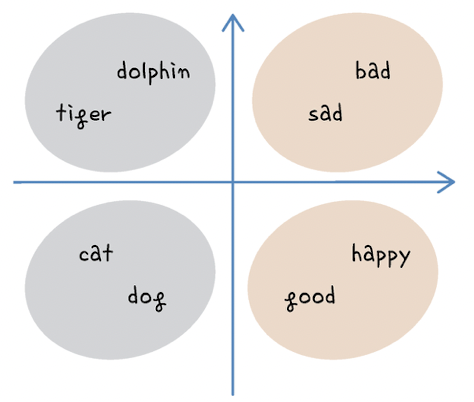

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/rnn/단어유사도.png')
# keras에서 Embedding 클레스를 통해서 지원

# 소량의 리뷰 텍스트을 읽고, 긍정, 부정 예측하기

## 데이터 준비

In [ ]:
import numpy as np

# 리뷰데이터
docs = [
  "지렸어.. 이 말 밖에 표현할 방법이 없어..",
  "뻔한 이야기를 재밌게 잘 만든 영화! 비행씬은 역대 최고가 아닐까?",
  "인생영화임,진짜최고",
  "내가 2시간동안 천국에 다녀왔다",
  "N 차관람 하고싶은 영화 말이필요없음",

  "진짜 최악.보다가 화남",
  "3를 위한 영화...액션은 더 화려해졌다",

  "배우들 연기는 좋은데...하...",
  "스토리가 많이 아쉽다. 그리고 번역체같은 대사들에 몰입하고 공감하기ㅜ어려웠다. 배우들의 열연은 좋았음.",
  " 지루하기만하다어떻게상탄걸까",
]
# 긍정 : 1, 부정 : 0
classes = np.array( [1,1,1,1,1, 0,1,0,0,0] )

In [ ]:
len(docs), classes.shape

(10, (10,))

## 토큰화

- 말뭉치->분절->사전화->문장을수치로 표현

In [ ]:
token = Tokenizer()
token.fit_on_texts( docs )
# 토큰 52개(사전에 52개의 토큰이 준비)
print(len(token.word_index) )
print(token.word_index )

52
{'영화': 1, '지렸어': 2, '이': 3, '말': 4, '밖에': 5, '표현할': 6, '방법이': 7, '없어': 8, '뻔한': 9, '이야기를': 10, '재밌게': 11, '잘': 12, '만든': 13, '비행씬은': 14, '역대': 15, '최고가': 16, '아닐까': 17, '인생영화임': 18, '진짜최고': 19, '내가': 20, '2시간동안': 21, '천국에': 22, '다녀왔다': 23, 'n': 24, '차관람': 25, '하고싶은': 26, '말이필요없음': 27, '진짜': 28, '최악': 29, '보다가': 30, '화남': 31, '3를': 32, '위한': 33, '액션은': 34, '더': 35, '화려해졌다': 36, '배우들': 37, '연기는': 38, '좋은데': 39, '하': 40, '스토리가': 41, '많이': 42, '아쉽다': 43, '그리고': 44, '번역체같은': 45, '대사들에': 46, '몰입하고': 47, '공감하기ㅜ어려웠다': 48, '배우들의': 49, '열연은': 50, '좋았음': 51, '지루하기만하다어떻게상탄걸까': 52}


In [ ]:
x = token.texts_to_sequences(docs)
# 문장을 수치로 표현했다
x

[[2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 1, 14, 15, 16, 17],
 [18, 19],
 [20, 21, 22, 23],
 [24, 25, 26, 1, 27],
 [28, 29, 30, 31],
 [32, 33, 1, 34, 35, 36],
 [37, 38, 39, 40],
 [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
 [52]]

## 패딩

- 문장의 크기를 동일하게 맞춘다

In [ ]:
# 문장들중에서 가장 긴 길이를 가진 문자을 기준으로 패딩 진행(정보손실없음)
# 가장 긴 문장이 11개의 값을 가진 문장이고 차후 자동계산이 필요함
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 최대 길이를 입력하지 않으면 자동 계산해서 최대 길이값으로 패딩
# 시쿼스 데이터의 맨 앞자리를 0으로 만들고 싶다면 최대길이+1로 세팅(선호방식)
padded_x = pad_sequences(x, maxlen=(11+1))
padded_x

array([[ 0,  0,  0,  0,  0,  2,  3,  4,  5,  6,  7,  8],
       [ 0,  0,  9, 10, 11, 12, 13,  1, 14, 15, 16, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18, 19],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20, 21, 22, 23],
       [ 0,  0,  0,  0,  0,  0,  0, 24, 25, 26,  1, 27],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28, 29, 30, 31],
       [ 0,  0,  0,  0,  0,  0, 32, 33,  1, 34, 35, 36],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37, 38, 39, 40],
       [ 0, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 52]], dtype=int32)

In [ ]:
padded_x.shape

(10, 12)

## 단어 임베딩 및 인공신경망구축

- 긍정 부정을 예측하는 모델을 생성할때, 임베딩층을 개입시켜서 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
# Embedding => 딥러닝의 하나의 레이어(층)으로 제공

In [ ]:
# 토큰수 = 사전의 총개수 + 1
word_size = len(token.word_index) + 1
word_size

53

In [ ]:
# 모델 구성
model = Sequential()
# 층 구성
'''
input_dim    - 입력되는 데이터의 총 토큰수 => 53 => 원=핫인코딩 => 토큰 1개당 차지하는 자리수가 53칸
               ex) 만약 문장이 10개의 토큰으로 구성된다면 => (10+1)*53 데이터가 구성됨
output_dim   - 압축을 해서 표현되는(임베딩된) 토근을 몇개로 할것인가? => 10(설정값)
               ex) 20 => 한개의 문장은 크기 20으로 임베딩된다 (설정값)
input_length - 패딩된 데이터의 백터수
'''
model.add( Embedding(word_size, 20, input_length=padded_x.shape[1] ) )
# shape을 펴준다
model.add( Flatten() )
# 출력층 : sigmoid => 0~1
model.add( Dense(1, activation='sigmoid') )
# 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 12, 20)            1060      
                                                                 
 flatten_2 (Flatten)         (None, 240)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 241       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


## 컴파일 및 학습 및 예측

In [ ]:
# 최적화도구, 최적화를 판단하는 기준값(손실함수), 평가도구(정확도)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
padded_x.shape, classes.shape

((10, 12), (10,))

In [ ]:
# 훈련
model.fit( padded_x, classes, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 520ms/step - loss: 0.7001 - accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6945 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6890 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6835 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6781 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6727 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 20ms/step - loss: 0.6674 - accuracy: 0.9000
Epoch 8/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6621 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6569 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6516 - accuracy: 1.0000
Epoch 11/20
1/1 [===========

In [ ]:
# 테스트는 원래 한번도 만나지 않은 데이터를 사용 -> 단, 여기서는 임시로 진행
model.evaluate(padded_x, classes)

1/1 [==============================] - 0s 145ms/step - loss: 0.5935 - accuracy: 1.0000


[0.5934785604476929, 1.0]

- 개선
  - 데이터가 많아야 겟다
  - 패딩의 크기에 따라 정확도가 많이 갈린다(튜닝포인트)
  - 한글 전용 토큰화를 사용하지 않아서, 의미가 좀 부정확하다

# 한글 형태소 분석기를 이용한 자연어 처리

- http://bit.ly/2StqivH


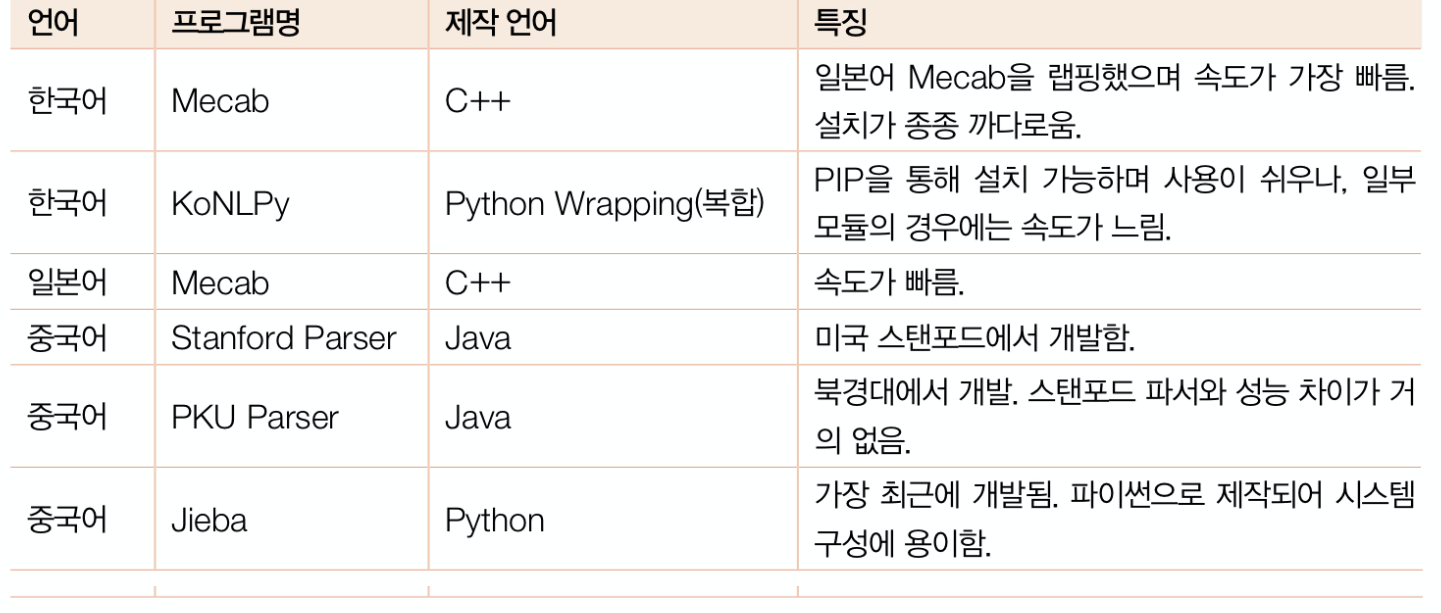

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/rnn/분절.png')

In [ ]:
!pip install konlpy

!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.3 MB/s 
     |████████████████████████████████| 453 kB 44.4 MB/s 
Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https:

In [ ]:
from konlpy.tag import Mecab

In [ ]:
# 텍스트
ko_senquence = '스토리가 많이 아쉽다. 그리고 번역체같은 대사들에 몰입하고 공감하기ㅜ어려웠다. 배우들의 열연은 좋았음.'
ko_senquence

'스토리가 많이 아쉽다. 그리고 번역체같은 대사들에 몰입하고 공감하기ㅜ어려웠다. 배우들의 열연은 좋았음.'

In [ ]:
# Mecab으로 토큰화 진행
tokenizer = Mecab()

In [ ]:
print( tokenizer.morphs( ko_senquence ) )
# 한글 상황에 맞게 분절 되엇다

['스토리', '가', '많이', '아쉽', '다', '.', '그리고', '번역', '체', '같', '은', '대사', '들', '에', '몰입', '하', '고', '공감', '하', '기', 'ㅜ', '어려웠', '다', '.', '배우', '들', '의', '열연', '은', '좋', '았', '음', '.']


In [ ]:
# 토큰의 성분을 같이 명시 (명사, 동사,....)
print( tokenizer.pos( ko_senquence ) )

[('스토리', 'NNG'), ('가', 'JKS'), ('많이', 'MAG'), ('아쉽', 'VA'), ('다', 'EF'), ('.', 'SF'), ('그리고', 'MAJ'), ('번역', 'NNG'), ('체', 'NNB'), ('같', 'VA'), ('은', 'ETM'), ('대사', 'NNG'), ('들', 'XSN'), ('에', 'JKB'), ('몰입', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('공감', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('ㅜ', 'UNKNOWN'), ('어려웠', 'VA+EP'), ('다', 'EF'), ('.', 'SF'), ('배우', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('열연', 'NNG'), ('은', 'JX'), ('좋', 'VA'), ('았', 'EP'), ('음', 'ETN'), ('.', 'SF')]


In [ ]:
# 성분을 우리말로 확인
tokenizer.tagset.get( 'NNG' )

'일반 명사'

In [ ]:
data = tokenizer.morphs( ko_senquence )
# 한글 기준의 토큰으로 구성된 한개의 문자열로 구성한다면
' '.join(data)
# 케라스의 토큰 처리 기준에 맞게 mecab으로 분절하여 문장으로 다시 재구성하면 한글에 적합한 토큰화가 된다

'스토리 가 많이 아쉽 다 . 그리고 번역 체 같 은 대사 들 에 몰입 하 고 공감 하 기 ㅜ 어려웠 다 . 배우 들 의 열연 은 좋 았 음 .'

# 실제 리뷰를 이용한 긍정부정 예측 모델 구성

- 기본 문장을 Mecab으로 분절수행 후 공백 구분자를 이용하여 다시 한개의 문장으로 전처리
- 케라스의 토큰화 클레스를 활용하여 텍스트의 백터화 진행
- 필요에 따라 임베딩 층을 활용하여 백터화된 데이터를 압축
- 데이터
  - rating_train.txt : 훈련 데이터
  - rating_test.txt : 테스트 데이터
- 인공신경망
  - Rnn, LSTM과 같은 순환신경망을 사용하지 않고 기본 DNN(Deep NN)을 활용해서 긍정/부정을 분류하는 모델을 생성

## 사전 데이터 준비

- 텍스트를 한글용 토큰 패키지를 활용하여 재처리
- 결측치 의미에 맞게 조정
- 훈련용, 테스트용 데이터 준비

In [ ]:
# 데이터 경로 정의
train_txt = '/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/ratings_train.txt'
test_txt  = '/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/ratings_test.txt'

In [ ]:
import pandas as pd

In [ ]:
def getTextData( fPath ):
  tmp = pd.read_csv( fPath, sep='\t', engine='python')
  print( tmp.info() )
  #display( tmp )
  return tmp['document'], tmp['label']

# 노코멘트한 리뷰는 긍정 혹은 부정의 의미로 사용될수 있다 -> 데이터로서 의미가 있다
# 이런 결측값은 제거할 필요가 없다 -> nan -> ''
X_train, y_train = getTextData( train_txt )
#X_test,  y_test  = getTextData( test_txt  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None


In [ ]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((150000,), (150000,), (138802,), (138802,))

In [ ]:
# document 값을 조사해서 결측이면 => '', 실제 존재하면 => Mecab 분절해서 , 공백을 구분자로 문자열 재구성
def getTextData( fPath ):
  tmp = pd.read_csv( fPath, sep='\t', engine='python')
  # tmp['document'] => 전처리후 리턴
  # 내부 함수(함수 안에 함수), 내부에서만 사용됨
  def xx( x ):
    if not x:
      return ''
    try:
      # 문장이 1개 입력 => 분절 => 공백기준으로 다시 한개의 문장으로 결합
      return ' '.join( tokenizer.morphs( x ) )
    except Exception as e:
      # 오류 발생하면 원본을 그대로 리턴
      return ''

  tmp['document'] = tmp['document'].apply( xx )
  return tmp['document'], tmp['label']

X_train, y_train = getTextData( train_txt )

In [ ]:
X_train

0                                   아 더빙 . . 진짜 짜증 나 네요 목소리
1            흠 . .. 포스터 보고 초딩 영화 줄 . ... 오버 연기 조차 가볍 지 않 구나
2                               너무 재 밓었 다 그래서 보 는 것 을 추천 한다
3                     교도소 이야기 구먼 . . 솔직히 재미 는 없 다 . . 평점 조정
4         사이몬페그 의 익살 스런 연기 가 돋보였 던 영화 ! 스파이더맨 에서 늙 어 보이 ...
                                ...                        
149995                         인간 이 문제 지 . . 소 는 뭔 죄 인가 . .
149996                                    평점 이 너무 낮 아서 . ..
149997                이게 뭐요 ? 한국인 은 거들먹거리 고 필리핀 혼혈 은 착하 다 ?
149998                  청춘 영화 의 최고봉 . 방황 과 우울 했 던 날 들 의 자화상
149999                         한국 영화 최초 로 수간 하 는 내용 이 담긴 영화
Name: document, Length: 150000, dtype: object

In [ ]:
# 테스트 데이터 준비
X_test,  y_test  = getTextData( test_txt  )

In [ ]:
type(X_train)

pandas.core.series.Series

# 토큰화 처리

In [ ]:
# 1. 토큰화 객체 생성
token = Tokenizer()
# 2. 텍스트를 넣어서 토큰화 진행 -> 사전 완성
token.fit_on_texts( X_train )
# 3. 텍스트를(한개의 문장 혹은 데이터 1개) 수치로(백터화) 표현 -> 문장의 길이별로 데이터 크기가 제각각
x     = token.texts_to_sequences( X_train )
# 4. 패딩 진행 -> 백터화된 문장의 크기를 동일하게 맞춘다
# 4-1. 데이터중 가장긴 문장의 길이 획득
s_max = 0
for n in x:
  if len(n) > s_max:
    s_max = len(n)
# 4-2. 패딩진행
padded_x = pad_sequences( x, s_max+1 )
padded_x.shape # 훈련에 사용할 데이터
# 5. 임베딩에 사용될 사전의 총수 + 1(빈값 한개: 맨 앞자리 비워주는 역활)
word_size = len(token.word_index) + 1

## 모델 구축및 학습 및 예측

In [ ]:
# 인공 신경망 구성
model = Sequential()
model.add( Embedding(word_size, 8, input_length=padded_x.shape[1] ) )
model.add( Flatten() )
model.add( Dense(1, activation='sigmoid') )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 117, 8)            426272    
                                                                 
 flatten_3 (Flatten)         (None, 936)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 937       
                                                                 
Total params: 427,209
Trainable params: 427,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일 및 학습
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit( padded_x, y_train, epochs=20)

Epoch 1/20
4688/4688 [==============================] - 36s 7ms/step - loss: 0.3998 - accuracy: 0.8212
Epoch 2/20
4688/4688 [==============================] - 36s 8ms/step - loss: 0.3116 - accuracy: 0.8712
Epoch 3/20
4688/4688 [==============================] - 35s 7ms/step - loss: 0.2811 - accuracy: 0.8872
Epoch 4/20
4688/4688 [==============================] - 41s 9ms/step - loss: 0.2552 - accuracy: 0.8989
Epoch 5/20
4688/4688 [==============================] - 40s 8ms/step - loss: 0.2301 - accuracy: 0.9107
Epoch 6/20
4688/4688 [==============================] - 41s 9ms/step - loss: 0.2042 - accuracy: 0.9216
Epoch 7/20
4688/4688 [==============================] - 41s 9ms/step - loss: 0.1798 - accuracy: 0.9331
Epoch 8/20
4688/4688 [==============================] - 40s 8ms/step - loss: 0.1588 - accuracy: 0.9422
Epoch 9/20
4688/4688 [==============================] - 39s 8ms/step - loss: 0.1413 - accuracy: 0.9488
Epoch 10/20
4688/4688 [==============================] - 39s 8ms/step - l

In [ ]:
# 테스트 데이터를 넣어서 예측
# X_test, y_test
# 테스트 데이터는 이미 구축된 토큰 객체에 데이터를 넣어서
# (이미 구축된 사전을 기반으로 진행)

# 토큰화 과정 3단계부터 진행
x     = token.texts_to_sequences( X_test )
# 테스트 데이터의 최대 문장길이가 훈련 데이터의 최대 문장길이보다 크다 -> 신경망 통과시 데이터 입력이 거부된다
# 테스트 데이터의 문장 길이가 더 컷다면 정보손실, 이니면 관게없음 => 117
padded_x = pad_sequences( x, 117 )

In [ ]:
padded_x.shape, y_test.shape

((138802, 117), (138802,))

In [ ]:
# 예측 ->
model.evaluate(padded_x, y_test)
# 훈련시 정확도는 0.9759 였는데, 테스트 데이터는  0.8024 이다
# 사유 => 훈련시 사용한 사전과, 테스트 데이터의 사전은 아마 서로 많이 상이할 것이다
# 테스트 데이터에만 존재하는 토큰들이 부정확성을 키웠을 것이다(예상)
# 신경망이 너무 단순하다. 자연어 처리에 적합한 신경망으로 교체가 필요 => RNN, LSTM, GRU, <= 순환신경망
# 기타 전용 신경망 버트(BERT),
# https://github.com/SKTBrain/KoBERT(한글에 적합하게 개량) -> 전이학습으로 사용가능

4338/4338 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.8024


[nan, 0.8023731708526611]

In [ ]:
# 시현 모델 -> 웹
# 리뷰 입력 => 서버에 전달 => 예측모델이 예측 => 결과를 리턴 => 당신의 리뷰는 ?% 확률로 긍정적으로 판단됩니다.